## What does this notebook do?
This notebook accesses data from the [UCS Satellite Database](https://www.ucsusa.org/resources/satellite-database) to analyse the payloads launched in orbit. The database includes in-depth details on the 7,560 satellites currently orbiting Earth, including their country of origin, purpose, and other operational information. For extra information, please refer to the [user's manual](https://s3.amazonaws.com/ucs-documents/nuclear-weapons/sat-database/4-11-17-update/User+Guide+1-1-17+wAppendix.pdf).

## Requirements:
To use this notebook uncomment and run the required line below to ensure necessary packages are present locally/ in the cloud.

In [1]:
# %pip install matplotlib pandas seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

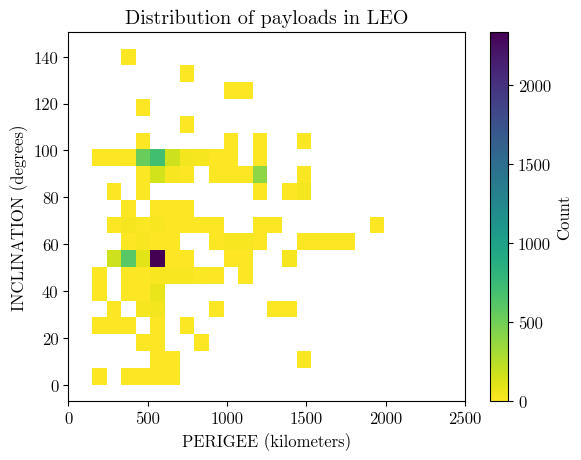

In [3]:
"""
UCS Satellite Database
In-depth details on the 7,560 satellites
currently orbiting Earth, including their 
country of origin, purpose, and other 
operational details.
"""
FILE_PATH1 = "../source/UCS-Satellite-Database-1-1-2023.xlsx"

dataFrame1 = pd.read_excel(FILE_PATH1)

# Drops columns with NaN values
dataFrame1.dropna(axis = 1, inplace = True)

"""
Using any available fonts is permissible for the plots, 
but I chose CMU Serif for aesthetic reasons.
For Ubuntu you can install the font package fonts-cmu 
(using sudo apt install fonts-cmu) which contains the fonts.
"""
# plt.rcParams['font.family'] = "CMU Serif"
# plt.rcParams['font.size'] = 12

dataFrame1["Inclination (degrees)"] = pd.to_numeric(dataFrame1["Inclination (degrees)"], 
                                                    errors = 'coerce')
dataFrame1 = dataFrame1[(dataFrame1["Inclination (degrees)"] >= 0) & 
                        (dataFrame1["Inclination (degrees)"] <= 180) & 
                        (dataFrame1["Perigee (km)"] <= 2000)]

# Plots the distribution of payloads in LEO
sns.histplot(x = 'Perigee (km)', y = 'Inclination (degrees)', data = dataFrame1, 
             cmap = 'viridis_r', 
             cbar = True, 
             cbar_kws = {'label': 'Count'}, bins = 20)

plt.xlim(0, 2500)
plt.xlabel("PERIGEE (kilometers)")
plt.ylabel("INCLINATION (degrees)")
plt.title("Distribution of payloads in LEO")

plt.show()